### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2024 Semester 2

## Assignment 2

## This iPython notebook is a template which you should use for your Assignment 2 submission. This file should be submitted at the **Assignment 2: Code** link on the LMS.

In addition to this file, you should submit a written report explaining your results at the **Assignment 2: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

## 1. CNN training

The following code provides a baseline implementation that you will modify by placing code in the speficied sections below. You may also change the batch sizes or image sizes if you wish.

The first block of code loads all the pieces of TensorFlow and Keras we need.  Add more imports here if you need them.


In [1]:
from datetime import datetime
from packaging import version

import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version: ", tf.__version__)
print("Keras version: ", keras.__version__)

2024-09-07 20:21:59.383828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version:  2.10.0
Keras version:  2.10.0


This block sets the size of the patch that we're going to process with our network.  The patches on disk in the dataset are 64x64 with each image being a pair of patches side by side, so the input images are 128x64. If you change the imsize, the dataloader will rescale the images for you.

In [2]:
# set the image size that we're loading # 64 is the size of the image patches on disk.
imsize = 64

This block loads the training and test datasets. If the 'train' and 'validate' directories are in your current workign directory, the below code will load them. Change the 'directory' arguments if you have put them somewhere else

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='./train/',
    labels='inferred',
    shuffle=True,
    label_mode='int',
    image_size=(2*imsize,imsize))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='./validate/',
    labels='inferred',
    label_mode='int',
    image_size=(2*imsize,imsize))

Found 20000 files belonging to 2 classes.


2024-09-07 20:22:06.411536: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 2500 files belonging to 2 classes.


This block extracts 8 examples from the dataset and displays them and their labels

tf.Tensor([1 0 0 1 0 0 0 1], shape=(8,), dtype=int32)


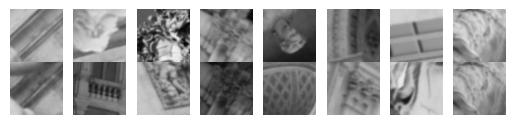

In [4]:
images, labels = train_ds.batch(8).take(1).get_single_element()
images = images[0]
labels = labels[0]
print(labels[0:8])
f, axarr = plt.subplots(1,8)
for i in range(8):
    axarr[i].imshow(images[i,:,:,:].numpy().astype("uint8"))
    axarr[i].set_axis_off()

### Baseline model implementation

This is the basic model to run for part 1 of the assignment before you make your own models

In [5]:
mlp1 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ]
)

## 2 Regularization

Create an implementation for your regularized model here, e.g.

mlp2 = ...

In [7]:
# Your implementation for part 2 goes here
# Dropout rate is 0.2
mlp2_1 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.2),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ]
)

In [8]:
# Dropout rate is 0.5
mlp2_2 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.5),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ]
)

In [9]:
# Dropout rate is 0.6
mlp2_3 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.6),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ]
)


## 3 CNN

Create an implementation for your convolutional model here, e.g.

mlp3 = ...

In [10]:
# Your implementation for part 3 goes here

cnn1 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Conv2D(8, (5,5), 1, activation='relu'),# A convolution layer with 8 filters, kernel size 5x5 and no stride
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ]
)

In [11]:
cnn1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 2, 64, 64, 3)      0         
                                                                 
 layer_normalization_5 (Laye  (None, 2, 64, 64, 3)     24576     
 rNormalization)                                                 
                                                                 
 conv2d (Conv2D)             (None, 2, 60, 60, 8)      608       
                                                                 
 flatten_5 (Flatten)         (None, 57600)             0         
                                                                 
 dense_10 (Dense)            (None, 16)                921616    
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                      

In [12]:
# Your implementation for part 3 goes here

# setting2
cnn2 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Conv2D(8, (5,5), (2, 2), activation='relu'), # A convolution layer with 8 filters, kernel size 5x5 and stride (2,2)
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.5),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ] 
)

In [13]:
cnn2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_6 (Reshape)         (None, 2, 64, 64, 3)      0         
                                                                 
 layer_normalization_6 (Laye  (None, 2, 64, 64, 3)     24576     
 rNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 30, 30, 8)      608       
                                                                 
 flatten_6 (Flatten)         (None, 14400)             0         
                                                                 
 dropout_4 (Dropout)         (None, 14400)             0         
                                                                 
 dense_12 (Dense)            (None, 16)                230416    
                                                      

In [14]:
# Your implementation for part 3 goes here

# setting3
cnn3 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Conv2D(8, (5,5), 1, activation='relu'),# A convolution layer with 8 filters, kernel size 5x5 and no stride
        layers.Conv2D(8, (5,5), 1, activation='relu'),
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.5),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ] 
)

In [15]:
cnn3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_7 (Reshape)         (None, 2, 64, 64, 3)      0         
                                                                 
 layer_normalization_7 (Laye  (None, 2, 64, 64, 3)     24576     
 rNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 60, 60, 8)      608       
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 56, 56, 8)      1608      
                                                                 
 flatten_7 (Flatten)         (None, 50176)             0         
                                                                 
 dropout_5 (Dropout)         (None, 50176)             0         
                                                      

In [16]:
# Your implementation for part 3 goes here

# setting4
cnn4 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Conv2D(8, (5,5), 1, activation='relu'),# A convolution layer with 8 filters, kernel size 5x5 and no stride
        layers.Conv2D(8, (5,5), 1, activation='relu'),
        layers.MaxPooling3D(pool_size=(1,4,4), strides=(1,2,2)), # A max pooling layer with poolsize (1,4,4) and stride (1,2,2)
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.5),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ] 
)

In [17]:
cnn4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_8 (Reshape)         (None, 2, 64, 64, 3)      0         
                                                                 
 layer_normalization_8 (Laye  (None, 2, 64, 64, 3)     24576     
 rNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 60, 60, 8)      608       
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 56, 56, 8)      1608      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 2, 27, 27, 8)     0         
 )                                                               
                                                                 
 flatten_8 (Flatten)         (None, 11664)            

In [18]:
# Your implementation for part 3 goes here

# setting5
cnn5 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Conv2D(8, (5,5), strides=(2,2), activation='relu'), # A convolution layer with 8 filters, kernel size 5x5 and stride (2, 2)
        layers.Conv2D(8, (5,5), strides=(2,2), activation='relu'),
        layers.MaxPooling3D(pool_size=(1,4,4), strides=(1,2,2)), # A max pooling layer with poolsize (1,4,4) and stride (1,2,2)
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.5),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ] 
)

In [19]:
cnn5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_9 (Reshape)         (None, 2, 64, 64, 3)      0         
                                                                 
 layer_normalization_9 (Laye  (None, 2, 64, 64, 3)     24576     
 rNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 30, 30, 8)      608       
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 13, 13, 8)      1608      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 2, 5, 5, 8)       0         
 3D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 400)              

In [20]:
# Your implementation for part 3 goes here

# setting6
cnn6 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Conv2D(8, (8,8), strides=(2,2), activation='relu'), # A convolution layer with 8 filters, kernel size 8x8 and stride (2,2)
        layers.Conv2D(8, (8,8), strides=(2,2), activation='relu'),
        layers.MaxPooling3D(pool_size=(1,4,4), strides=(1,2,2)), # A max pooling layer with poolsize (1,4,4) and stride (1,2,2)
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.5),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ] 
)

In [21]:
cnn6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_10 (Reshape)        (None, 2, 64, 64, 3)      0         
                                                                 
 layer_normalization_10 (Lay  (None, 2, 64, 64, 3)     24576     
 erNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 29, 29, 8)      1544      
                                                                 
 conv2d_9 (Conv2D)           (None, 2, 11, 11, 8)      4104      
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 2, 4, 4, 8)       0         
 3D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 256)             

In [22]:
# Your implementation for part 3 goes here

# setting7
cnn7 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Conv2D(8, (5,5), activation='relu'),   # A convolution layer with 8 filters, kernel size 5x5 and no stride
        layers.Conv2D(8, (5,5), activation='relu'),
        layers.MaxPooling3D(pool_size=(1,4,4), strides=(1,2,2)),    # A max pooling layer with poolsize (1,4,4) and stride (1,2,2)
        layers.Conv2D(16, (3,3), strides=(2,2), activation='relu'), # A convolution layer with 16 filters, kernel size 3x3 and stride (2,2)
        layers.Conv2D(16, (3,3), strides=(2,2), activation='relu'),
        layers.MaxPooling3D(pool_size=(1,4,4), strides=(1,2,2)), 
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.5),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ] 
)

In [23]:
cnn7.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_11 (Reshape)        (None, 2, 64, 64, 3)      0         
                                                                 
 layer_normalization_11 (Lay  (None, 2, 64, 64, 3)     24576     
 erNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 2, 60, 60, 8)      608       
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 56, 56, 8)      1608      
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 2, 27, 27, 8)     0         
 3D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 2, 13, 13, 16)   

In [24]:
# Your implementation for part 3 goes here

# setting8
cnn8 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Conv2D(16, (5,5), strides=(2,2), activation='relu'), # A convolution layer with 16 filters, kernel size 5x5 and stride (2,2)
        layers.Conv2D(16, (5,5), strides=(2,2), activation='relu'),
        layers.MaxPooling3D(pool_size=(1,8,8), strides=(1,2,2)),    # A max pooling layer with pool size (1,8,8) and stride (1,2,2)
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.5),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ] 
)

In [25]:
cnn8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_12 (Reshape)        (None, 2, 64, 64, 3)      0         
                                                                 
 layer_normalization_12 (Lay  (None, 2, 64, 64, 3)     24576     
 erNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 30, 30, 16)     1216      
                                                                 
 conv2d_15 (Conv2D)          (None, 2, 13, 13, 16)     6416      
                                                                 
 max_pooling3d_5 (MaxPooling  (None, 2, 3, 3, 16)      0         
 3D)                                                             
                                                                 
 flatten_12 (Flatten)        (None, 288)             

In [26]:
# Your implementation for part 3 goes here

# setting9
cnn9 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Conv2D(16, (5,5), strides=(2,2), activation='relu'), # A convolution layer with 16 filters, kernel size 5x5 and stride (2,2)
        layers.Conv2D(16, (5,5), strides=(2,2), activation='relu'),
        layers.MaxPooling3D(pool_size=(1,4,4), strides=(1,2,2)),    # A max pooling layer with pool size (1,4,4) and stride (1,2,2)
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.5),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ] 
)

In [27]:
cnn9.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_13 (Reshape)        (None, 2, 64, 64, 3)      0         
                                                                 
 layer_normalization_13 (Lay  (None, 2, 64, 64, 3)     24576     
 erNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 2, 30, 30, 16)     1216      
                                                                 
 conv2d_17 (Conv2D)          (None, 2, 13, 13, 16)     6416      
                                                                 
 max_pooling3d_6 (MaxPooling  (None, 2, 5, 5, 16)      0         
 3D)                                                             
                                                                 
 flatten_13 (Flatten)        (None, 800)             

In [28]:
# Your implementation for part 3 goes here

# setting10
cnn10 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Conv2D(16, (5,5), activation='relu'),  # A convolution layer with 16 filters, kernel size 5x5 and no stride 
        layers.Conv2D(16, (5,5), activation='relu'),
        layers.Conv2D(32, (3,3), strides=(2,2), activation='relu'), # A convolution layer with 32 filters, kernel size 3x3 and stride (2,2)
        layers.Conv2D(32, (3,3), strides=(2,2), activation='relu'),
        layers.MaxPooling3D(pool_size=(1,4,4), strides=(1,2,2)),    # A max pooling layer with pool size (1,4,4) and stride (1,2,2)
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.5),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ] 
)

In [29]:
cnn10.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_14 (Reshape)        (None, 2, 64, 64, 3)      0         
                                                                 
 layer_normalization_14 (Lay  (None, 2, 64, 64, 3)     24576     
 erNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 2, 60, 60, 16)     1216      
                                                                 
 conv2d_19 (Conv2D)          (None, 2, 56, 56, 16)     6416      
                                                                 
 conv2d_20 (Conv2D)          (None, 2, 27, 27, 32)     4640      
                                                                 
 conv2d_21 (Conv2D)          (None, 2, 13, 13, 32)     9248      
                                                     

In [30]:
# Your implementation for part 3 goes here

# setting11
cnn11 = keras.Sequential(
    [
        layers.Input((2*imsize,imsize,3)),            # Tell Keras the shape of the input array (a 3-channel twice imsize by imsize image)
        layers.Reshape((2,imsize,imsize,3)),          # Turn the input into two 64x64 images
        layers.LayerNormalization(axis=[-1,-2,-3]),   # Normalize each image independently to mean=zero and sigma=one. YOUR MODEL WILL NOT WORK PROPERLY IF YOU DO NOT DO THIS
        layers.Conv2D(32, (3,3), strides=(2,2), activation='relu'), # A convolution layer with 32 filters, kernel size 3x3 and stride (2,2)
        layers.Conv2D(32, (3,3), strides=(2,2), activation='relu'),
        layers.MaxPooling3D(pool_size=(1,4,4), strides=(1,2,2)),    # A max pooling layer with pool size (1,4,4) and stride (1,2,2)
        layers.Flatten(),                             # Unravel/flatten the input array
        layers.Dropout(rate=0.5),                     # A dropout layer 
        layers.Dense(16,activation='relu'),           # A single hidden layer with 16 outputs 
        layers.Dense(2,activation='softmax')          # A fully-connected layer with a softmax activation function to generate probabilities for the two classes (0bad and 1good)
    ] 
)

In [31]:
cnn11.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_15 (Reshape)        (None, 2, 64, 64, 3)      0         
                                                                 
 layer_normalization_15 (Lay  (None, 2, 64, 64, 3)     24576     
 erNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 31, 31, 32)     896       
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 15, 15, 32)     9248      
                                                                 
 max_pooling3d_8 (MaxPooling  (None, 2, 6, 6, 32)      0         
 3D)                                                             
                                                                 
 flatten_15 (Flatten)        (None, 2304)            

### Select which model you are going to run

If you name your models mlp2, mpl3 etc, you can replace the code with mlp = mlp2 etc.

In [32]:
mlp = cnn3
dropout = ''

In [33]:
# Configure the model
mlp.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #use SparseCategoricalCrossentropy because labels are integers. If the labels are one-hot representation, please use CategoricalCrossentropy loss.
           metrics=['accuracy'])

In [71]:
# Start training
#history_mlp = mlp.fit(x=images, y=labels, epochs=20, validation_split=0.2, shuffle=True)
history_mlp = mlp.fit(x=train_ds, epochs=20, validation_data = validation_ds, shuffle=True)


Epoch 1/20
625/625 [==============================] - 64s 102ms/step - loss: 0.3224 - accuracy: 0.8669 - val_loss: 0.3598 - val_accuracy: 0.8356
Epoch 2/20
625/625 [==============================] - 69s 110ms/step - loss: 0.2672 - accuracy: 0.8927 - val_loss: 0.3423 - val_accuracy: 0.8400
Epoch 3/20
625/625 [==============================] - 73s 117ms/step - loss: 0.1976 - accuracy: 0.9244 - val_loss: 0.4064 - val_accuracy: 0.8256
Epoch 4/20
625/625 [==============================] - 75s 120ms/step - loss: 0.1382 - accuracy: 0.9480 - val_loss: 0.4285 - val_accuracy: 0.8316
Epoch 5/20
625/625 [==============================] - 73s 117ms/step - loss: 0.1084 - accuracy: 0.9603 - val_loss: 0.5497 - val_accuracy: 0.8208
Epoch 6/20
625/625 [==============================] - 75s 120ms/step - loss: 0.0886 - accuracy: 0.9665 - val_loss: 0.4669 - val_accuracy: 0.8364
Epoch 7/20
625/625 [==============================] - 74s 119ms/step - loss: 0.0748 - accuracy: 0.9722 - val_loss: 0.6302 - val_ac

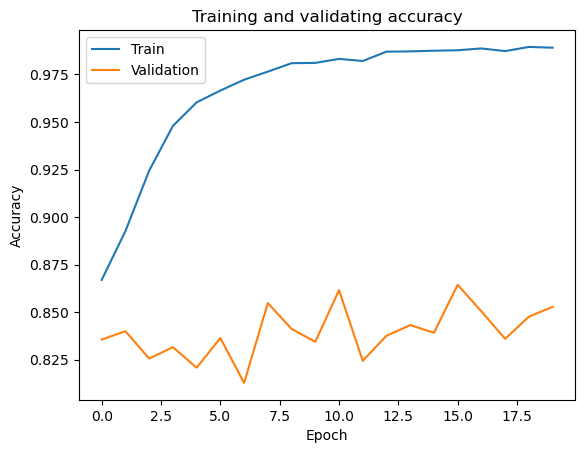

In [74]:
plt.plot(history_mlp.history['accuracy'], label='Train')
plt.plot(history_mlp.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and validating accuracy' + dropout)
plt.legend()
plt.show()

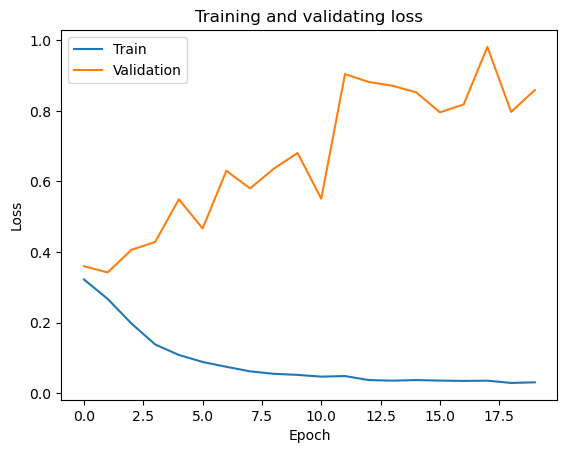

In [75]:
plt.plot(history_mlp.history['loss'], label='Train')
plt.plot(history_mlp.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and validating loss' + dropout)
plt.legend()
plt.show()